In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airbnb_data = pd.read_csv("listings 2.csv")

In [3]:
len(airbnb_data)

8949

In [3]:
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

In [4]:
airbnb_data = airbnb_data[airbnb_data['price'] != 99998]

In [5]:
price_statistics = airbnb_data['price'].describe()
price_statistics

count    8337.000000
mean      161.194075
std       204.717839
min         7.000000
25%        70.000000
50%       115.000000
75%       178.000000
max      5000.000000
Name: price, dtype: float64

In [6]:
columns_needed = [
    'id', 'name', 'neighborhood_overview', 'host_id', 'host_name', 'host_since',
    'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_identity_verified',
    'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
    'bathrooms_text', 'beds', 'price', 'number_of_reviews', 'number_of_reviews_ltm',
    'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value',
    'latitude', 'longitude', 'description', "host_about"
]

filtered_airbnb_data = airbnb_data[columns_needed]

<ipython-input-45-d6b427489d9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_airbnb_data['host_since'] = pd.to_datetime(filtered_airbnb_data['host_since'])


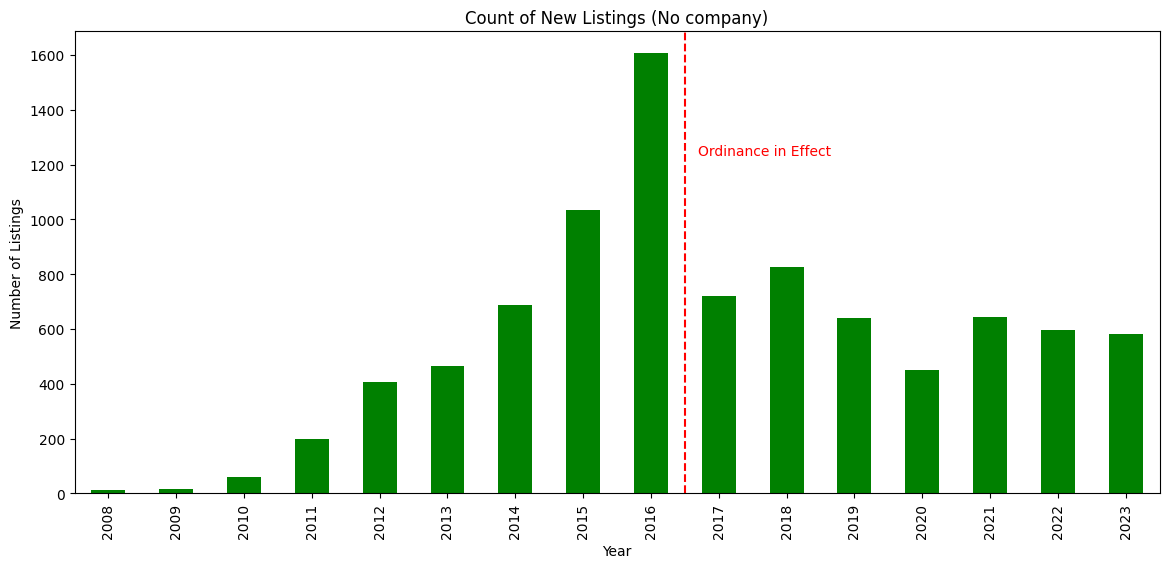

In [45]:
#filtered_airbnb_data.loc[:, 'host_since'] = pd.to_datetime(filtered_airbnb_data['host_since'])
filtered_airbnb_data['host_since'] = pd.to_datetime(filtered_airbnb_data['host_since'])
plot_data = filtered_airbnb_data['host_since'].dt.year.value_counts().sort_index()


plt.figure(figsize=(14, 6))
plot_data.plot(kind='bar', color='green')
plt.title('Count of New Listings (No company)')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(False)

if 2016 in plot_data and 2017 in plot_data:
    year_2016 = plot_data.index.get_loc(2016) + 0.5
    plt.axvline(x=year_2016, color='red', linestyle='--')
    plt.text(year_2016 + 0.2, max(plot_data) / 1.3, 'Ordinance in Effect', rotation=0, color='red')

plt.show()

In [49]:
dec_2016_listings = filtered_airbnb_data[filtered_airbnb_data['host_since'].dt.year == 2016]
dec_2016_listings = dec_2016_listings[dec_2016_listings['host_since'].dt.month == 12]

In [50]:
hosts_with_counts = dec_2016_listings['host_id'].value_counts()
host_with_many_listings = hosts_with_counts[hosts_with_counts > 600].index.tolist()

specific_host_listings = dec_2016_listings[dec_2016_listings['host_id'].isin(host_with_many_listings)]
unique_locations = specific_host_listings[['latitude', 'longitude']].drop_duplicates()
unique_names = specific_host_listings['name'].drop_duplicates()
unique_descriptions = specific_host_listings['description'].drop_duplicates()

len(host_with_many_listings), unique_locations.shape[0], unique_names.shape[0], unique_descriptions.shape[0]

(1, 106, 23, 1)

In [51]:
sample_listings = specific_host_listings[['name', 'host_name', 'description', 'latitude', 'longitude']].sample(5, random_state=1)
sample_listings

,name,host_name,description,latitude,longitude
8054,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,Blueground,NaN,41.969205,-87.655816
6464,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,Blueground,NaN,41.891162,-87.622263
6086,Rental unit in Chicago · 1 bedroom · 1 bed · 1...,Blueground,NaN,41.872529,-87.630861
5041,Rental unit in Chicago · 2 bedrooms · 2 beds ·...,Blueground,NaN,41.877229,-87.629011
8868,Rental unit in Chicago · ★New · 1 bedroom · 1 ...,Blueground,NaN,41.893728,-87.656393


In [ ]:
specific_host_listings['location_name_combined'] = specific_host_listings['latitude'].astype(str) + \
                                                   specific_host_listings['longitude'].astype(str) + \
                                                   specific_host_listings['name']
total_unique_listings = specific_host_listings['location_name_combined'].nunique()
total_unique_listings

In [10]:
company_keywords = ['company', 'property', 'corporate']

non_company_listings = filtered_airbnb_data[
    (filtered_airbnb_data['host_listings_count'] <= 5) &
    (filtered_airbnb_data['host_total_listings_count'] <= 5)
]

company_mask = non_company_listings['host_about'].str.contains('|'.join(company_keywords), case=False, na=False)
individual_host = non_company_listings[~company_mask]

In [11]:
len(individual_host)

4160

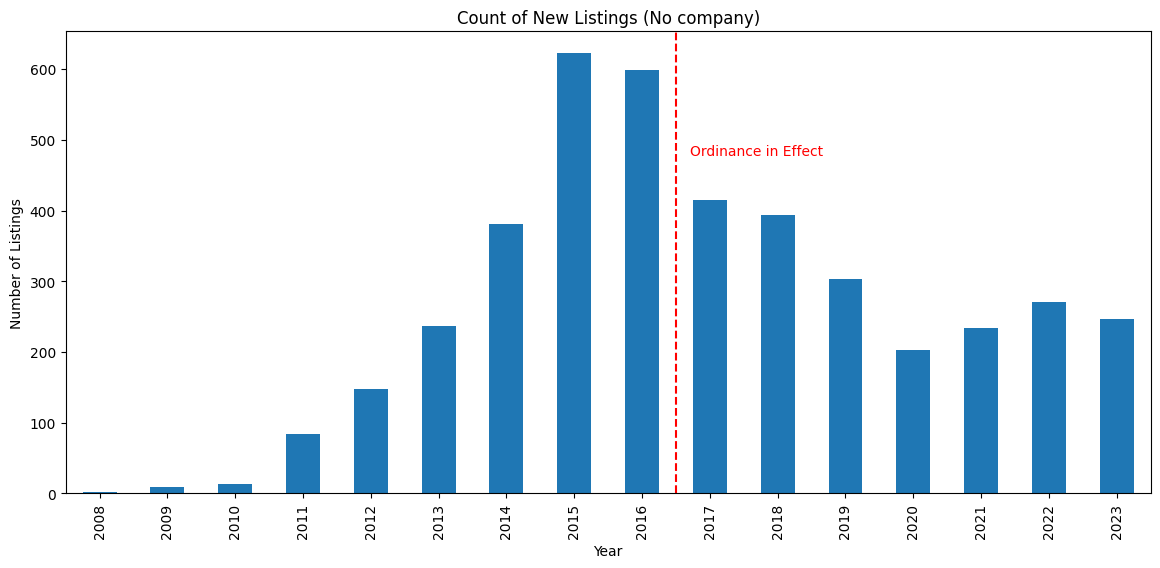

In [12]:
individual_host.loc[:, 'host_since'] = pd.to_datetime(individual_host['host_since'])
plot_data = individual_host['host_since'].dt.year.value_counts().sort_index()

plt.figure(figsize=(14, 6))
plot_data.plot(kind='bar')
plt.title('Count of New Listings (No company)')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(False)

if 2016 in plot_data and 2017 in plot_data:
    year_2016 = plot_data.index.get_loc(2016) + 0.5
    plt.axvline(x=year_2016, color='red', linestyle='--')
    plt.text(year_2016 + 0.2, max(plot_data) / 1.3, 'Ordinance in Effect', rotation=0, color='red')

plt.show()

<Figure size 1400x1000 with 0 Axes>

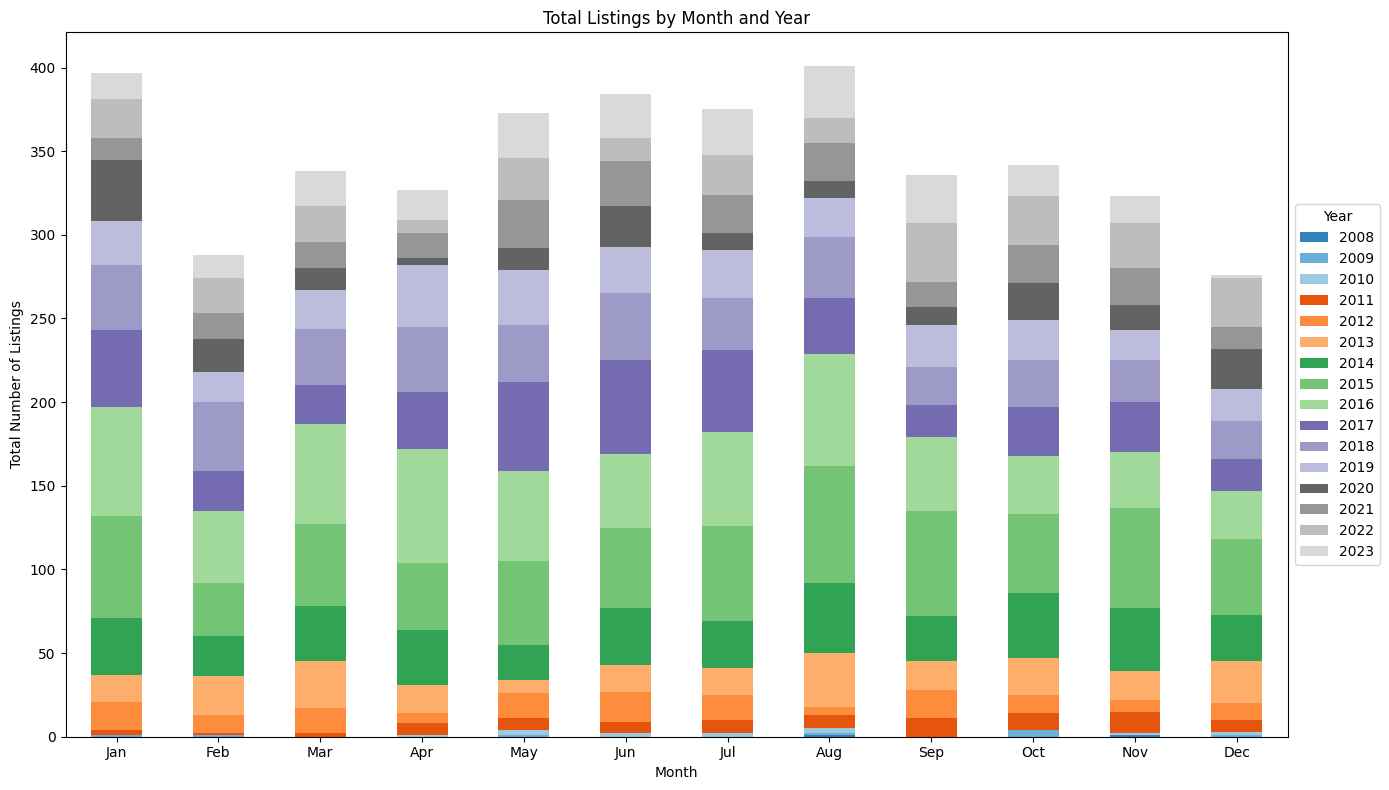

In [22]:
individual_host.loc[:, 'year'] = individual_host['host_since'].dt.year
individual_host.loc[:, 'month'] = individual_host['host_since'].dt.month

month_year_grouped = individual_host.groupby(['month', 'year']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
month_year_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Total Listings by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Number of Listings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(False)
plt.tight_layout()
plt.show()

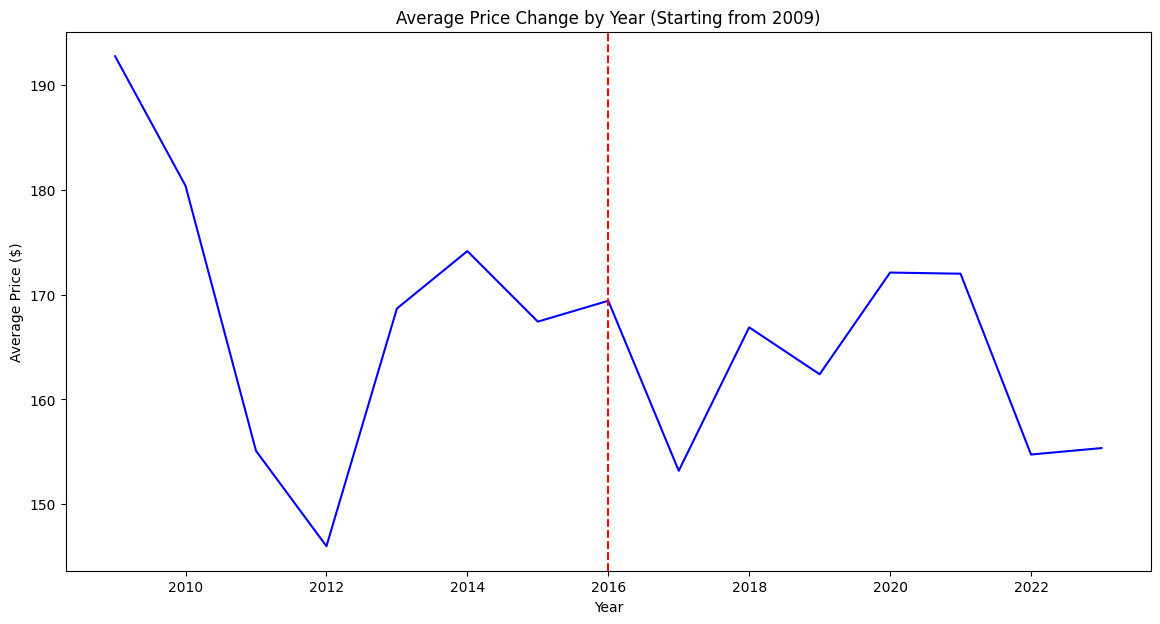

In [38]:
average_price_per_year = individual_host.groupby('year')['price'].mean()

average_price_per_year_filtered = average_price_per_year[average_price_per_year.index >= 2009]

plt.figure(figsize=(14, 7))
average_price_per_year_filtered.plot(kind='line', marker='', linestyle='-', color='blue')
plt.title('Average Price Change by Year (Starting from 2009)')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(False)
plt.axvline(x=2016, color='red', linestyle='--')

plt.show()

<Figure size 1400x800 with 0 Axes>

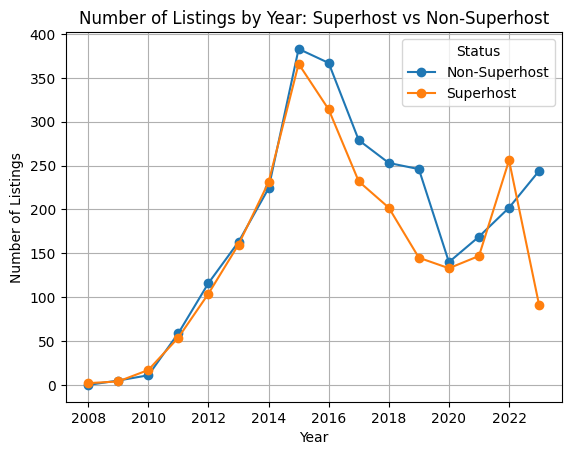

In [ ]:
superhost_status_by_year = filtered_airbnb_data.groupby(['year', 'host_is_superhost']).size().unstack('host_is_superhost', fill_value=0)

plt.figure(figsize=(14, 8))
superhost_status_by_year.plot(kind='line', marker='o')
plt.title('Number of Listings by Year: Superhost vs Non-Superhost')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.legend(['Non-Superhost', 'Superhost'], title='Status')
plt.show()

<Figure size 1400x800 with 0 Axes>

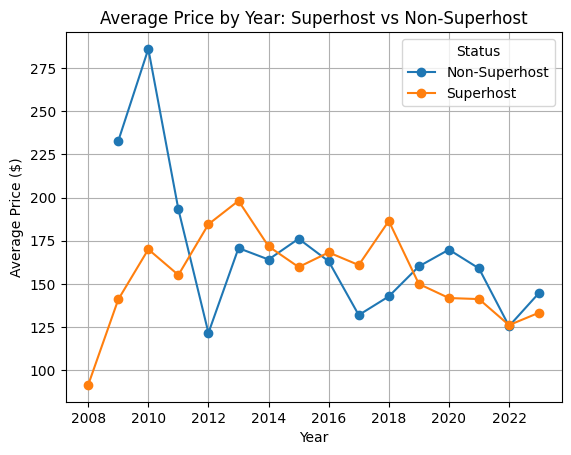

In [ ]:
price_by_year_superhost = filtered_airbnb_data.groupby(['year', 'host_is_superhost'])['price'].mean().unstack('host_is_superhost')
plt.figure(figsize=(14, 8))
price_by_year_superhost.plot(kind='line', marker='o')
plt.title('Average Price by Year: Superhost vs Non-Superhost')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.legend(['Non-Superhost', 'Superhost'], title='Status')
plt.show()

In [46]:
company_listings = filtered_airbnb_data[
    (filtered_airbnb_data['host_listings_count'] > 5) |
    (filtered_airbnb_data['host_total_listings_count'] > 5)
]

company_keyword_mask = filtered_airbnb_data['host_about'].str.contains('|'.join(company_keywords), case=False, na=False)
company_listings = pd.concat([company_listings, filtered_airbnb_data[company_keyword_mask]]).drop_duplicates()

company_listings['host_since'] = pd.to_datetime(company_listings['host_since'])
company_listings['year'] = company_listings['host_since'].dt.year
company_listings['month'] = company_listings['host_since'].dt.month

high_price_listings_2014 = company_listings[company_listings['year'] == 2016]
high_price_listings_2014 = high_price_listings_2014.sort_values(by='price', ascending=False)

# Show details of these listings
high_price_listings_2014[['id', 'host_id', 'host_name', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'price']].head(5)

,id,host_id,host_name,neighbourhood_cleansed,property_type,room_type,accommodates,price
4863,620916541701563155,98193524,Mary And JW,Loop,Entire condo,Entire home/apt,16,1100.0
4705,598647855022557143,77414650,Red Door,Woodlawn,Entire condo,Entire home/apt,16,943.0
2094,34974374,76133827,Anny,West Town,Entire condo,Entire home/apt,16,911.0
3534,49399182,98193524,Mary And JW,Near North Side,Entire serviced apartment,Entire home/apt,16,824.0
1093,20650575,76133827,Anny,West Town,Entire condo,Entire home/apt,14,779.0


In [14]:
# For price outlier
unwanted_host = 'RoomPicks By Antony'
unwanted_year = 2014
company_listings['year'] = company_listings['host_since'].dt.year
mask = ~((company_listings['host_name'] == unwanted_host) & (company_listings['year'] == unwanted_year))
company_listings = company_listings[mask]

In [15]:
unwanted_id = [35060034, 781027791738193889]
mask = ~company_listings['id'].isin(unwanted_id)
company_listings = company_listings[mask]

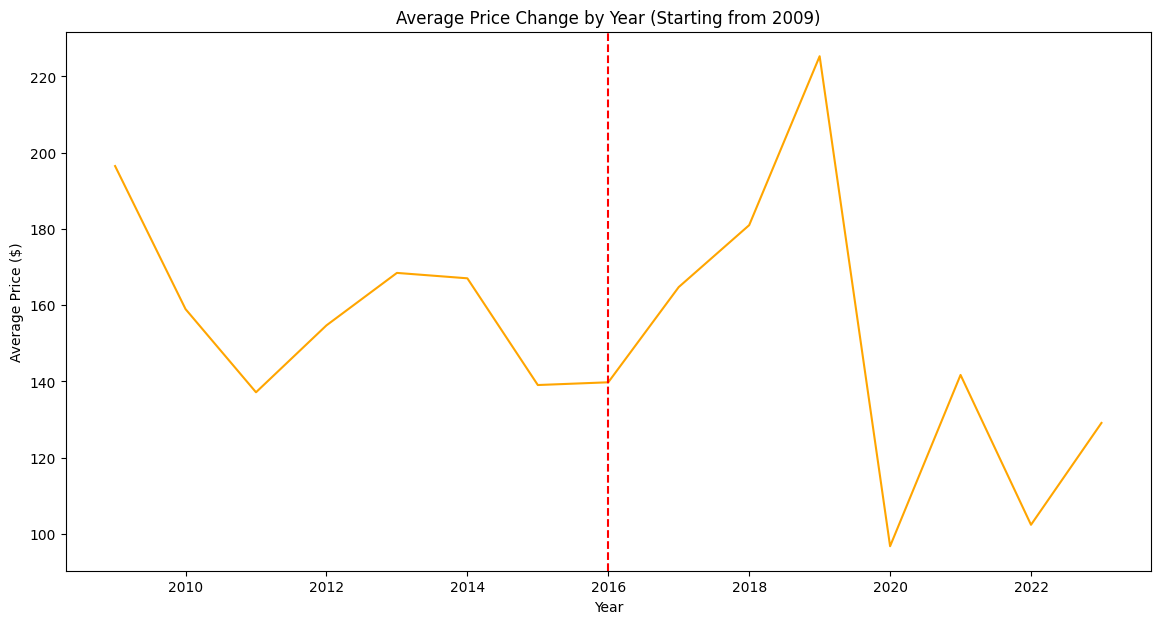

In [40]:
average_price_per_year = company_listings.groupby('year')['price'].mean()

average_price_per_year_filtered = average_price_per_year[average_price_per_year.index >= 2009]

plt.figure(figsize=(14, 7))
average_price_per_year_filtered.plot(kind='line', marker='', linestyle='-', color='orange')
plt.title('Average Price Change by Year (Starting from 2009)')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(False)
plt.axvline(x=2016, color='red', linestyle='--')

plt.show()

In [52]:
unwanted_host = 'Blueground'
unwanted_year = 2016
company_listings['year'] = company_listings['host_since'].dt.year
mask = ~((company_listings['host_name'] == unwanted_host) & (company_listings['year'] == unwanted_year))
company_listings = company_listings[mask]

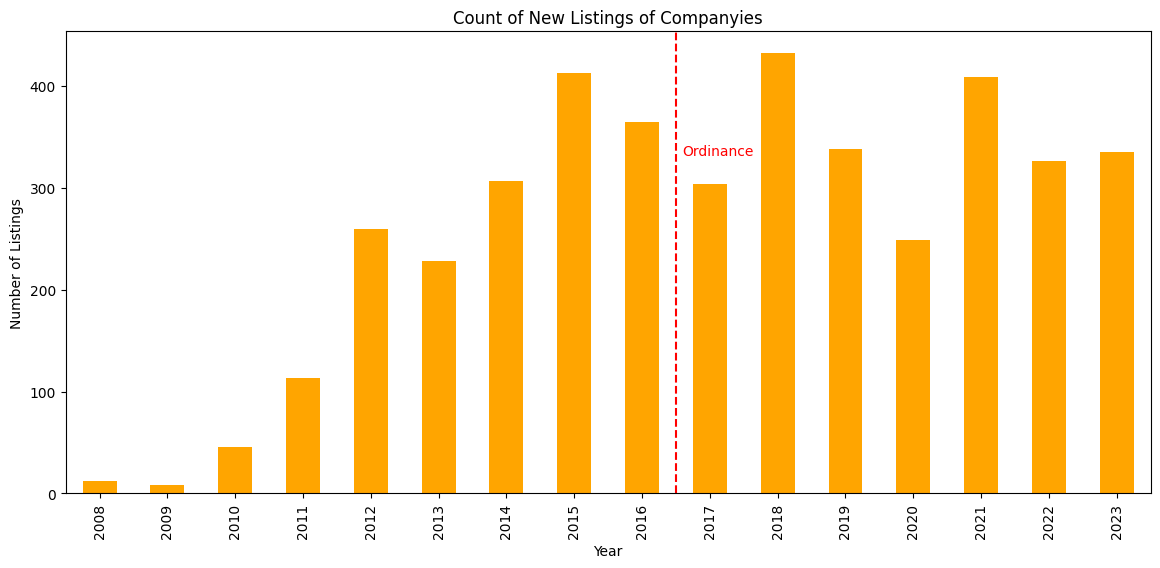

In [54]:
plot_data = company_listings['host_since'].dt.year.value_counts().sort_index()

plt.figure(figsize=(14, 6))
plot_data.plot(kind='bar', color='orange')
plt.title('Count of New Listings of Companyies')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.grid(False)

if 2016 in plot_data and 2017 in plot_data:
    year_2016 = plot_data.index.get_loc(2016) + 0.5
    plt.axvline(x=year_2016, color='red', linestyle='--')
    plt.text(year_2016 + 0.1, max(plot_data) / 1.3, 'Ordinance', rotation=0, color='red')

plt.show()

## Checking with chicago's prohibited housing with our dataset

In [ ]:
import numpy as np
from sklearn.neighbors import BallTree

airbnb_data = pd.read_csv("listings 2.csv")
prohibited_data = pd.read_csv("House_Share_Prohibited_Buildings_List_20240429.csv")

airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)
airbnb_data = airbnb_data[airbnb_data['price'] != 99998]
airbnb_data['host_since'] = pd.to_datetime(airbnb_data['host_since'])
airbnb_data['year'] = airbnb_data['host_since'].dt.year

company_keywords = ['company', 'property', 'corporate']
company_listings_count_based = airbnb_data[
    (airbnb_data['host_listings_count'] > 10) |
    (airbnb_data['host_total_listings_count'] > 10)
]
company_keyword_mask = airbnb_data['host_about'].str.contains('|'.join(company_keywords), case=False, na=False)
company_listings_keyword_based = airbnb_data[company_keyword_mask]
company_listings = pd.concat([company_listings_count_based, company_listings_keyword_based]).drop_duplicates(subset='id')

people_listings = airbnb_data[
    (airbnb_data['host_listings_count'] <= 10) &
    (airbnb_data['host_total_listings_count'] <= 10) &
    ~airbnb_data['id'].isin(company_listings['id'])
]

airbnb_coords = airbnb_data[['latitude', 'longitude']].apply(np.radians)
prohibited_coords = prohibited_data[['Latitude', 'Longitude']].dropna().apply(np.radians)
tree = BallTree(prohibited_coords, metric='haversine')

radius = 3 / 6371000

indices = tree.query_radius(airbnb_coords, r=radius)
matches = [i for i, inds in enumerate(indices) if len(inds) > 0]
matching_airbnb = airbnb_data.iloc[matches]

In [ ]:
# Determine if matched listings are hosted by companies or individuals
matched_company_listings = matching_airbnb[matching_airbnb['id'].isin(company_listings['id'])]
matched_people_listings = matching_airbnb[matching_airbnb['id'].isin(people_listings['id'])]

# Summary of company hosts within prohibited areas
matched_company_hosts = matched_company_listings['host_id'].nunique()
matched_company_total_listings = matched_company_listings.shape[0]
matched_company_average_listings_per_host = matched_company_total_listings / matched_company_hosts if matched_company_hosts else 0

# Summary of individual hosts within prohibited areas
matched_people_hosts = matched_people_listings['host_id'].nunique()
matched_people_total_listings = matched_people_listings.shape[0]
matched_people_average_listings_per_host = matched_people_total_listings / matched_people_hosts if matched_people_hosts else 0

{
    "company_hosts": {
        "unique_hosts": matched_company_hosts,
        "total_listings": matched_company_total_listings,
        "average_listings_per_host": matched_company_average_listings_per_host
    },
    "individual_hosts": {
        "unique_hosts": matched_people_hosts,
        "total_listings": matched_people_total_listings,
        "average_listings_per_host": matched_people_average_listings_per_host
    }
}


{'company_hosts': {'unique_hosts': 1,
  'total_listings': 1,
  'average_listings_per_host': 1.0},
 'individual_hosts': {'unique_hosts': 0,
  'total_listings': 0,
  'average_listings_per_host': 0}}

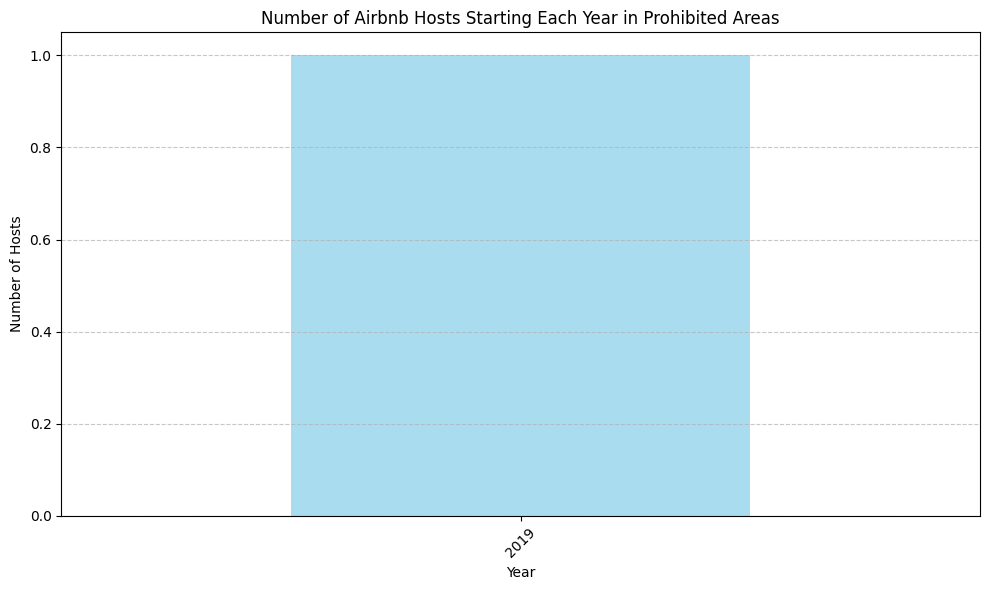

In [ ]:
company_host_years = matched_company_listings[['host_id', 'year']].drop_duplicates().sort_values(by='year')
individual_host_years = matched_people_listings[['host_id', 'year']].drop_duplicates().sort_values(by='year')

all_years = pd.concat([company_host_years[['year']], individual_host_years[['year']]])
year_counts = all_years['year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Airbnb Hosts Starting Each Year in Prohibited Areas')
plt.xlabel('Year')
plt.ylabel('Number of Hosts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()